In [1]:
from collections import defaultdict  # For counting members by age.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches  # For drawing boxes on the plot.
import pandas as pd
import seaborn as sns

In [2]:
# Prepare generational data for plotting as boxes on chart:
CURRENT_YEAR = 2023
_GEN_NAMES = ['Silent', 'Boomers', 'Gen X', 'Millennials', 'Gen Z']
_GEN_START_YR = [1928, 1946, 1965, 1981, 1997]
_GEN_END_YR = [1945, 1964, 1980, 1996, 2012]  
_GEN_START_AGE = [CURRENT_YEAR - x for x in _GEN_END_YR]
_GEN_END_AGE = [CURRENT_YEAR - x for x in _GEN_START_YR]
_GEN_COLORS = ['lightgray', 'white', 'lightgray', 'white', 'lightgray']

In [3]:
# Load the data:
df = pd.read_csv('https://bit.ly/3EdQrai')

# Assign the current date:
current_date = pd.to_datetime('8/30/2023')

# Convert "Birthday" column to datetime:
df['Birthday'] = pd.to_datetime(df['Birthday'])

# Make a new "Age" column in years:
df['Age'] = ((current_date - df['Birthday']).dt.days) / 365.25
df['Age'] = df['Age'].astype(int)

df.head(3)

,Name,Birthday,Party,Branch,Age
0,Aaron Bean,1967-01-25,R,House,56
1,Abigail Spanberger,1979-08-07,D,House,44
2,Adam Schiff,1960-06-22,D,House,63


In [4]:
# Initialize count columns:
df['R count house'] = 0
df['D count house'] = 0
df['R count senate'] = 0
df['D count senate'] = 0

# Create dictionaries with default values of 0:
r_count_h_dict = defaultdict(int)
d_count_h_dict = defaultdict(int)
r_count_s_dict = defaultdict(int)
d_count_s_dict = defaultdict(int)

# Iterate through the DataFrame and update counts:
for index, row in df.iterrows():
    age = row['Age']
    if row['Branch'] == 'House':
        if row['Party'] == 'R':
            r_count_h_dict[age] += 1
            df.at[index, 'R count house'] = r_count_h_dict[age]
        elif row['Party'] == 'D':
            d_count_h_dict[age] -= 1
            df.at[index, 'D count house'] = d_count_h_dict[age]
    elif row['Branch'] == 'Senate':
        if row['Party'] == 'R':
            r_count_s_dict[age] += 1
            df.at[index, 'R count senate'] = r_count_s_dict[age]
        elif row['Party'] == 'D':
            d_count_s_dict[age] -= 1
            df.at[index, 'D count senate'] = d_count_s_dict[age]
        elif row['Party'] == 'I':
            d_count_s_dict[age] -= 1
            df.at[index, 'D count senate'] = d_count_s_dict[age]

df.head(3)

,Name,Birthday,Party,Branch,Age,R count house,D count house,R count senate,D count senate
0,Aaron Bean,1967-01-25,R,House,56,1,0,0,0
1,Abigail Spanberger,1979-08-07,D,House,44,0,-1,0,0
2,Adam Schiff,1960-06-22,D,House,63,0,-1,0,0


In [5]:
# Filter out zero values:
mask = df != 0

# Apply the mask to the DataFrame:
df = df[mask]

df.head(3)

,Name,Birthday,Party,Branch,Age,R count house,D count house,R count senate,D count senate
0,Aaron Bean,1967-01-25,R,House,56,1.0,NaN,NaN,NaN
1,Abigail Spanberger,1979-08-07,D,House,44,NaN,-1.0,NaN,NaN
2,Adam Schiff,1960-06-22,D,House,63,NaN,-1.0,NaN,NaN


In [6]:
def make_plot(data, ax, x, color, title):
    """Make a custom seaborn scatterplot with annotations."""
    sns.scatterplot(data=data, 
                    x=x, 
                    y='Age', 
                    marker='$\u25AC$', 
                    color=color, 
                    edgecolor=color, 
                    ax=ax, 
                    legend=False)
    
    # Set the border positions and visibility:
    ax.spines.left.set_position('zero')
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')
    ax.spines.bottom.set_color('none')
    
    # Set x and y limits, ticks, labels, and title:
    ax.set_xlim(-15, 15)
    ax.set_ylim(25, 100)
    ax.tick_params(bottom=False)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)

    # Manually annotate the y-axis along the right border:
    ax.text(x=12.5, y=96, s='Age')
    ax.set_yticks(np.arange(30, 101, 10))
    ylabels = [30, 40, 50, 60, 70, 80, 90]
    for label in ylabels:
        ax.text(x=13, y=label, s=str(label))
    
    # Add shading and annotation for each generation:
    for _, (name, start_age, end_age, gcolor) in enumerate(zip(_GEN_NAMES, 
                                                               _GEN_START_AGE,
                                                               _GEN_END_AGE, 
                                                               _GEN_COLORS)):
        rect = patches.Rectangle((-15, start_age), 
                                 width=30, 
                                 height=end_age - start_age, 
                                 facecolor=gcolor, 
                                 alpha=0.3)
        rect.set_zorder(0)  # Move shading below other elements.
        ax.add_patch(rect)
        ax.text(x=-15, y=end_age - 2, s=name)
        
    plt.tight_layout()

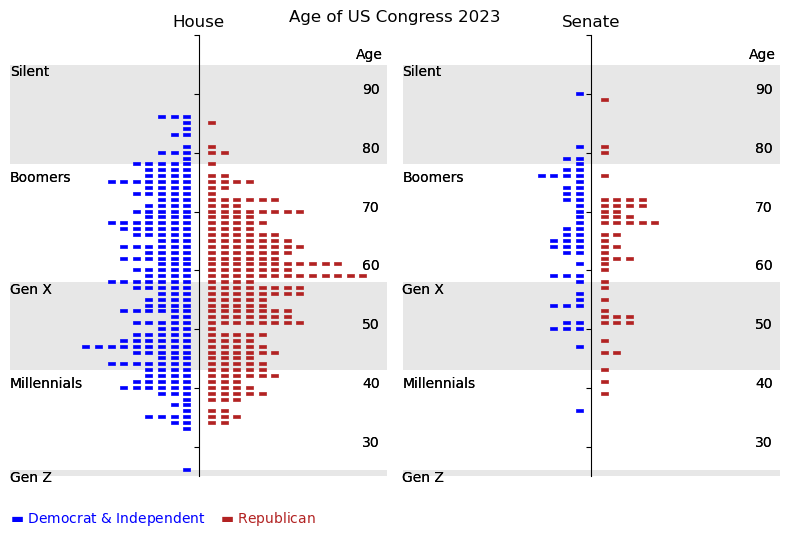

In [7]:
# Make the figure and call the plotting function:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
make_plot(df, ax0, 'D count house', 'blue', 'House' )
make_plot(df, ax0, 'R count house', 'firebrick', 'House')
make_plot(df, ax1, 'D count senate', 'blue', 'Senate')
make_plot(df, ax1, 'R count senate', 'firebrick', 'Senate')

# Add figure title and custom legend:
fig.suptitle('Age of US Congress 2023')
ax0.text(x=-15, y=17, s='$\u25AC$ Democrat & Independent', color='blue')
ax0.text(x=1.7, y=17, s='$\u25AC$ Republican', color='firebrick');

# Optional line to save figure:
# plt.savefig('age_of_congress.png', bbox_inches='tight', dpi=600)